In [5]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers

#Normalização dos anos
ano = np.array([1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

ano_media = np.mean(ano)
ano_std = np.std(ano)
ano_normalizado = (ano - ano_media)/ano_std

#Dados disponíveis para pesca industrial
anos_com_dados = np.delete(ano, [12,13,14,15,16,17])

anos_com_dados_norm = np.delete(ano_normalizado, [12,13,14,15,16,17])
pesca_ind = np.array([20,129,18,115,20,12,87,23,57,30,6,21,286,488.5,252.5,345.5,637.5,214,387.5,389.5,444,421.5,507,572.5,2.167,28.509,22.627,210.691,201.510,76.178,94.943,25.068,0.023,70.803,44.520,38.862,13.997,25.392,13.432])

pi_media = np.mean(pesca_ind)
pi_std = np.sqrt( np.sum((pesca_ind - pi_media)**2)/38  )
pi_normalizado = (pesca_ind - pi_media)/pi_std


#Colocando dados normalizados no formato de entrada da rede
anos_com_dados_norm = anos_com_dados_norm.reshape(39,1)
pi_normalizado = pi_normalizado.reshape((39,1))

#Dados a serem preditos(anos sem pesca industrial)
aspi_normalizado = np.array([])
anos_sem_pesca_ind=np.array([])
for i in [12,13,14,15,16,17]:
    aspi_normalizado = np.append(aspi_normalizado,ano_normalizado[i])
    anos_sem_pesca_ind = np.append(anos_sem_pesca_ind,ano[i])


In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
history = model.fit(anos_com_dados_norm,pi_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Lulas/pesos pesca ind/.weights.h5', overwrite=False)


In [11]:
#Pegando o modelo e seus pesos salvos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Lulas/pesos pesca ind/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[ 32.540527]
 [ 38.079422]
 [ 48.506042]
 [ 67.34895 ]
 [109.8571  ]
 [203.3954  ]]


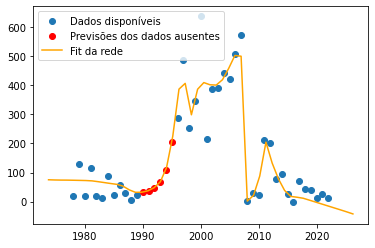

In [12]:
#Previsões
prev_geral = model.predict(anos_com_dados)*pi_std + pi_media
prev_ausentes = model.predict(aspi_normalizado)*pi_std + pi_media

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca_ind,label='Dados disponíveis')
f1.scatter(anos_sem_pesca_ind,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pi_std + pi_media
f1.plot(p*ano_std + ano_media,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

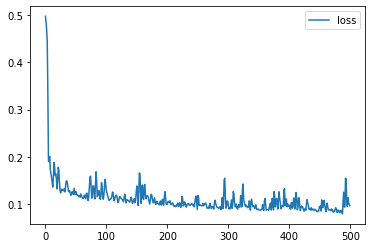

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()